# **Project No:** *4*<br/>
# **Title:** <font color='red'>*Steganography via Least Norm ("Introduction to Applied Linear Algebra", p.354, Exercise 16.13)*</font><br/><br/>

[PART 1](#part1) (Data Preparation):
* [Libraries](#li)
* [Obtain Data](#od)
* [User-Defined Variables](#udv)
* [Supportive Functions](#sf)


[PART 2](#part2) (Tasks):
  * [Task 1](#t1) (Encoding via least norm)
  * [Task 2](#t2) (Complexity)
  * [Task 3](#t3) (Implementing Steganography)

<br>

# References
* [Introduction to Applied Linear Algebra](https://github.com/geoav74/aueb_projects/blob/main/numerical_opt_%26_large-scale_linear_algebra/vmls.pdf)

<a name="part1"></a>
# <font color='green'>**PART 1**

<a name="li"></a>
>## **Libraries**

In [ ]:
# general
import os
import math
import random
import time
import numpy as np
import pandas as pd
from statistics import mean
from tqdm.notebook import tqdm
from google.colab import drive

# graphics
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

<a name="od"></a>
>## **Obtain Data**

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip '/content/drive/MyDrive/images.zip' -d '/content'

Archive:  /content/drive/MyDrive/images.zip
   creating: /content/images/
  inflating: /content/__MACOSX/._images  
  inflating: /content/images/Cameraman.jpg  
  inflating: /content/__MACOSX/images/._Cameraman.jpg  
  inflating: /content/images/Lena.jpg  
  inflating: /content/__MACOSX/images/._Lena.jpg  


In [ ]:
!rm -R __MACOSX

<a name="udv"></a>
>## **User-Defined Variables**

In [ ]:
#the folder name where the zip-ed images are in google drive
root = 'images'

<a name="sf"></a>
>## **Supportive Functions**

In [ ]:
def Normalize(arr):
  '''
  USAGE: Function that normalizes array values between [0...1]
  TODO:
    1.  Insert an array
    2.  Perform appropriate comutations to retrieve normalized values
    3.  Return a normalized array to the user
  INPUT:
    An array (in our case an image)
  OUTPUT:
    An array with normalized values
  '''

  return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [ ]:
def image_read(path):
  '''
  USAGE: to retrieve an image from a folder
  TODO:
    1.  open an image given the file-path
    2.  store the image in a variable
    3.  normalize the image and store it
    4.  return the original image and its normalized ver to the user
  INPUT:
    the path where the image is located in google drive
  OUTPUT:
    the image and its normalized version
  '''
  try:
    image = Image.open(path)
    normImg = Normalize(np.asarray(image))
  except:
    print(f"WARNING: Excluding '{path}'...")
  return image, normImg

In [ ]:
def GetImages(folder_path):
  '''
  USAGE: to gather images from a folder and create a set of them
  TODO:
    1.  iterate through the folder where the images are
    2.  read each image and store
    3.  store the name of the image (file-path)
    4.  store the normalized version of each image
    5.  create a dataframe containing each image's data
    6.  return the dataframe to the user
  INPUT:
    the folder path where the images are
  OUTPUT:
    a dataframe containing the images' data
  '''
  names, images, normImgs = [], [], []

  for img_path in tqdm(os.listdir(folder_path)):
      img, norm = image_read(f'{folder_path}/{img_path}')
      images.append(img)
      names.append(img_path)
      normImgs.append(norm)

  df = pd.DataFrame({'name' : names, 'image' : images, 'normalizedImage' : normImgs})
  return df

<a name="part2"></a>
# <font color='red'>**PART 2**

<a name="t1"></a>
>## **Task 1** (Encoding via least norm)

Taking into concideration what's been discussed in Chapter 16 concerning the least norm problem, we can write:

\begin{gather} \\
D(x + z) = as \Rightarrow Dx + Dz = as \Rightarrow  Dz = as - Dx \quad (1)
\end{gather}
<br/><br/>

From (1) we can imply that:
\begin{gather} \\
\hat{z} = D^{\dagger} (as - Dx) \quad (2)
\end{gather}
<br/><br/>

Taking a closer look on our problem we can relate, as follows:
\begin{gather} \\
C=D \quad (3) \\
d=as−Dx \quad (4) \\ \\
(2)\xrightarrow[(4)]{(3)}
\begin{bmatrix}
2I & D^T \\
D & 0
\end{bmatrix}
\begin{bmatrix}
\hat{z} \\
\hat{\lambda}
\end{bmatrix}
=
\begin{bmatrix}
0 \\
as - Dx
\end{bmatrix} \quad (5)
\end{gather}
<br/><br/>

According to the book's Least Norm Problem direct solution, from the first block row of (5) it is derived the following equation:
\begin{gather} \\
2\hat{z} + D^T\hat{\lambda} = 0 \implies \hat{z} = -\dfrac{1}{2} D^T \hat{\lambda}\quad (6)
\end{gather}
<br/><br/>

From the second block row of (5) it is derived the following equation:
\begin{gather} \\
D\hat{z} = d =  as - Dx \quad (7) \\
(7) \xrightarrow{(6)} -\dfrac{1}{2} D D^T  \hat{\lambda} = as - Dx \quad (8)
\end{gather}
<br/><br/>

Assuming that D has independent rows, thus invertible, we can get:
\begin{gather} \\
(8) \implies \hat{\lambda} = -2 (D D^T)^{-1} (as - Dx) \quad (9) \\
(6) \xrightarrow{(9)} \hat{z} = \underbrace{D^T (D D^T)^{-1}}_{D^{\dagger}} (as - Dx) \implies \boxed{\hat{z} = D^{\dagger}(as - Dx)} \quad (10)
\end{gather}
<br/><br/>

<a name="t2"></a>
>## **Task 2** (Complexity)

For this task, i'll use as a reference a source found in the internet [ReadMe](https://www.stat.cmu.edu/~ryantibs/convexopt-F18/scribes/Lecture_19.pdf)
<br/><br/>

The task has three parts, as follows:
1. Estimating the complexity of encoding a secret message in an image.
2. Estimating the complexity of decoding the secret message.
3. Estimating the duration each of these take with a computer capable of 1 Gflop/s, for k=128 and n=512<sup>2</sup>=262144 (a 512 x 512 image).
<br/><br/>

Reviewing dimensions:
* $D$ : $k$ x $n$
* $x$ : $n$ x $1$
* $s$ : $k$ x $1$
* $D^{\dagger}$ : ($n$ x $k$)(($k$ x $n$)($n$ x $k$)) = $n$ x $k$

>> ### 2.1

While encoding, the following computations are made:
* $Dx$ : ($k$ x $n$)($n$ x $1$) = $k$ x $1$ $\approx 2kn \thinspace flops$
* $as$ : a($k$ x $1$) = $k$ x $1$ $\approx k \thinspace flops$
* $as - Dx$ : $k$ x $1$ $\approx k \thinspace flops$
* $D^{\dagger}(as - Dx)$ : ($n$ x $k$)($k$ x $1$) = $n$ x $1$ $\approx 2kn \thinspace flops$
<br/><br/>
Concidering that $n \gg k$, we can conclude that the maximum operation is  $\quad \boxed{\approx 4kn \thinspace flops}$

>> ### 2.2

While decoding, the following computations are made:
* $x$ + $z$ : ($n$ x $1$) + ($n$ x $1$) = $n$ x $1$ $\approx n \thinspace flops$
* $D(x+z)$ : ($k$ x $n$)($n$ x $1$) = $k$ x $1$ $\approx 2kn \thinspace flops$
<br/><br/>

We can conclude that the maximum operation is  $\quad \boxed{\approx 2kn+n \thinspace flops}$

>> ### 2.3

Considering the cable capabilities (1Gflop/s) and the other given specs of the excercise (k=128, n=512<sup>2</sup>), we can estimate the approximate duration during encoding and decoding, as follows: <br/><br/>
* Encoding Ops: <br/>
  From task 2.1 we get $\quad \approx 4kn \approx 4\times 128 \times 512^2 \boxed{\approx 1.34\times10^8 \thinspace flops}$, which is $\quad \approx 1.34\times \frac{10^8}{10^9}sec \boxed{\approx 134ms}$
<br/><br/>
* Decoding Ops: <br/>
  From task 2.2 we get $\quad \approx 2kn+n \approx 2\times 128 \times 512^2+512^2 \boxed{\approx 0.67\times10^8 \thinspace flops}$, which is $\quad \approx 0.67\times\frac{10^8}{10^9}sec \boxed{\approx 67ms}$
<br/><br/>


<a name="t3"></a>
>## **Task 3** (Implementing Steganography)

In [ ]:
def Stega(fo_path, imgData):
  '''
  USAGE: to implement steganography over an image
  TODO:
    1.  get the image data
    2.  create the secret message (s) [choice k=100, values -1,1]
    3.  define the matrices and vectors (x, D, Ddagger, xPLUSz)
    4.  walking through different values of alpha (a) parameter:
        * encode message
        * decode message
        * present modified image, error rate
    5.  compute and display the execution time
  INPUT:
    the path where the images' folder is and the image to process
  OUTPUT:
    it doesn't return anything to the user other than presenting our findings
  '''

  # image shape
  shapee = imgData.shape
  print(f'The shape of the image is : {shapee}')

  # defining the secret message s
  k0 = 100
  np.random.seed(0)
  s = np.random.choice([-1, 1], size = k0).reshape(-1, 1)
  k = s.shape[0]
  print(f'The size of the secret message (s) is k = {k}')

  # defining the flatten image vector x
  x = imgData.flatten().reshape(-1, 1)
  n =  x.shape[0]
  print(f'The size of vector x is n = {n}')

  # defining the arbitrary matrix D
  np.random.seed(0)
  D = np.random.uniform(-1, 1, (k, n))
  print(f'The size of matrix D (k x n) is : {D.shape}')
  print(f'The rank of matrix D is : {np.linalg.matrix_rank(D)}\n')

  # computing the pseudo-inverse matrix D-dagger
  Ddagger = np.linalg.pinv(D)

  # defining the alpha-values we're going to use. since (as the excercise states)
  #it is a try-out (and not an experiment finding out the best alpha-value), it is
  #not going to be a "brutal-search" over the alpha-value and will choose a set
  #of values to "play with"
  a = 10.0**(np.arange(-3, 7, 2))

  encoding_time, decoding_time, execution_time = [], [], []

  fig, ax = plt.subplots(2, 3, figsize=(15, 10))

  for i, axs in enumerate(ax.reshape(-1)):

    if i == 0:
      axs.imshow(imgData,  cmap='gray')
      axs.set_title('Initial Image')
    else:
      # calculating the vectors z and x+z. As the exercise states, we replace any negative values
      #in the modifed image with zero, and any other values greater than one with one.
      # additionally, we compute the execution time in ms units.
      start_encode = time.time()
      z = Ddagger.dot(a[i-1] * s - D.dot(x))
      xPLUSz = pd.Series((x+z).flatten()).apply(lambda x: 0 if x < 0 else 1 if x > 1 else x).to_numpy().reshape(-1,1)
      stop_encode = time.time()
      total_encode = round((stop_encode - start_encode) * 10**3, 2)
      encoding_time.append(total_encode)

      # decoding the message message
      start_decode = time.time()
      y = D.dot(xPLUSz)
      s_hat = np.sign(y)
      stop_decode = time.time()
      total_decode = round((stop_decode - start_decode) * 10**3, 2)
      decoding_time.append(total_decode)

      exec_time = round(total_encode + total_decode, 2)
      execution_time.append(exec_time)

      # calculating the error
      err = ((s_hat != s).sum() / (s_hat.shape[0])) * 100

      # presenting the modified image with the hidden message
      axs.imshow(xPLUSz.reshape(shapee),  cmap='gray')

      # setting title to the image
      axs.set_title(f"$\\alpha$ = {a[i-1]:.3f}\nError Rate: {err:.2f}%")

  fig.tight_layout()
  plt.show()

  timer = [encoding_time, decoding_time,  execution_time]

  # displaying the time during encoding, decoding and whole process
  print(f'\nThe average encoding time is: {mean(timer[0]):.2f}ms')
  print(f'The average time is: {mean(timer[1]):.2f}ms')
  print(f'The average process time is: {mean(timer[2]):.2f}ms \n')

In [ ]:
def sim(path):
  '''
  USAGE: to simulate steganography in a set of images
  TODO:
    1.  get the images
    2.  iterate through images:
        * run a steganography test
  INPUT:
    the path where the zip-ed images are located
  OUTPUT:
    the simulation results
  '''
  images = GetImages(path)
  print('\n')
  print(f'-----------------------------------------------------------------------------------------------------------------------------------------------------------')
  print(f'--------------------------------------------------------- STEGANOGRAPHY SIMULATION ------------------------------------------------------------------------')
  print(f'-----------------------------------------------------------------------------------------------------------------------------------------------------------')
  print('\n')

  for i in range(len(images)):
    print(f'Image : {i}')
    print(f"Image Name : {images['name'][i]}")
    Stega(path, images['normalizedImage'][i])
    print(f'----------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('\n')

  0%|          | 0/2 [00:00<?, ?it/s]



-----------------------------------------------------------------------------------------------------------------------------------------------------------
--------------------------------------------------------- STEGANOGRAPHY SIMULATION ------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------------------------


Image : 0
Image Name : Lena.jpg
The shape of the image is : (567, 567)
The size of the secret message (s) is k = 100
The size of vector x is n = 321489
The size of matrix D (k x n) is : (100, 321489)
The rank of matrix D is : 100



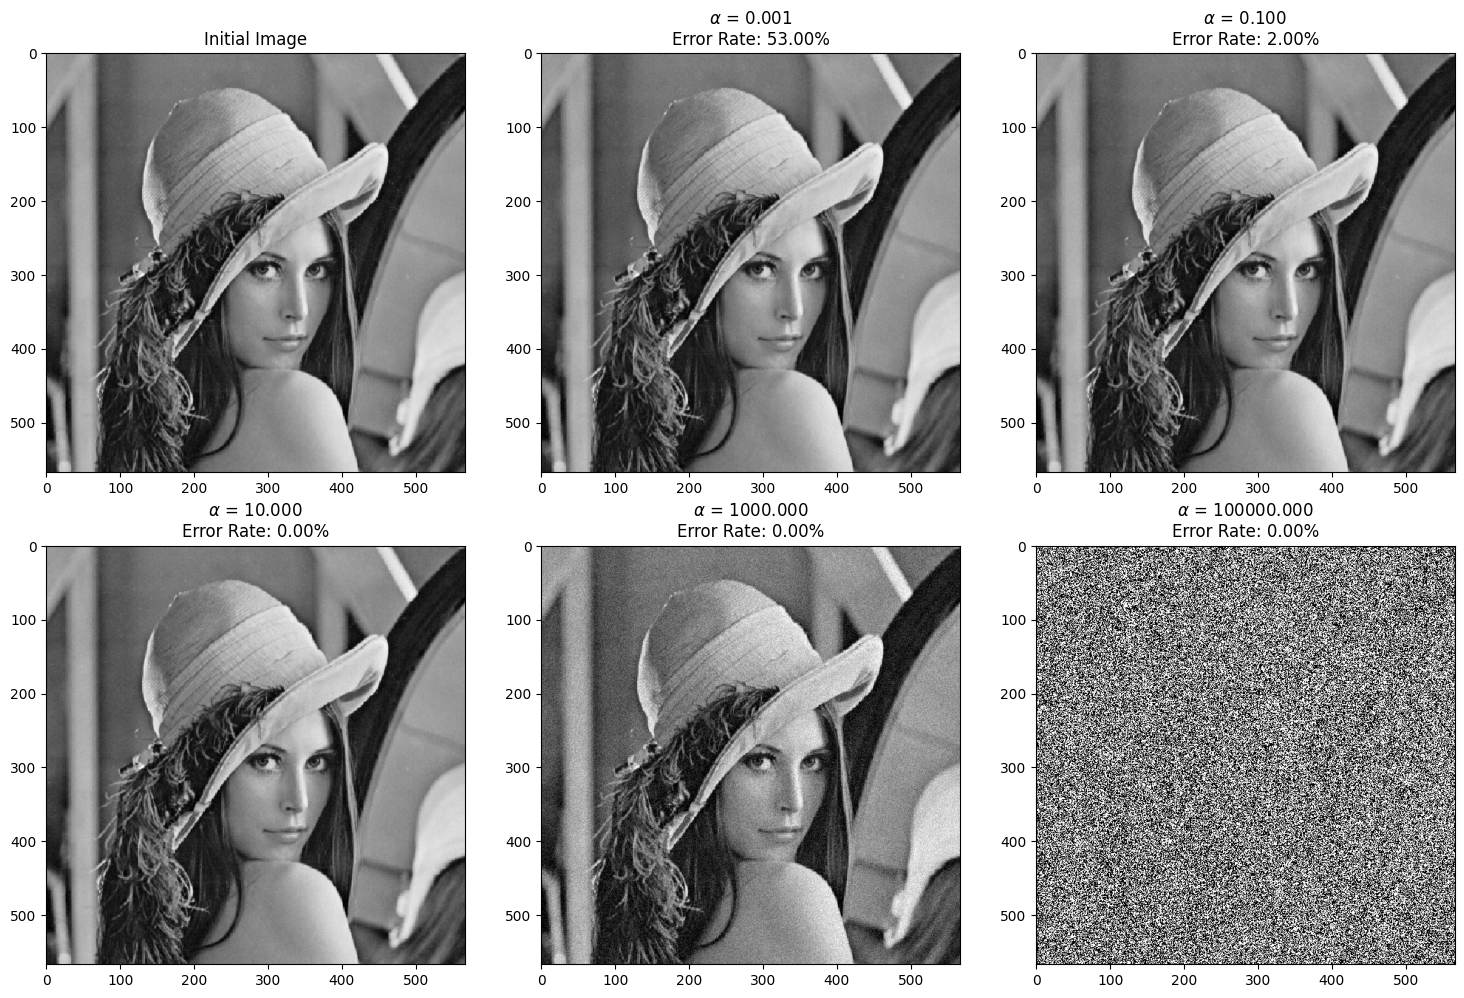


The average encoding time is: 202.83ms
The average time is: 18.92ms
The average process time is: 221.75ms 

----------------------------------------------------------------------------------------------------------------------------------------------------------


Image : 1
Image Name : Cameraman.jpg
The shape of the image is : (512, 512)
The size of the secret message (s) is k = 100
The size of vector x is n = 262144
The size of matrix D (k x n) is : (100, 262144)
The rank of matrix D is : 100



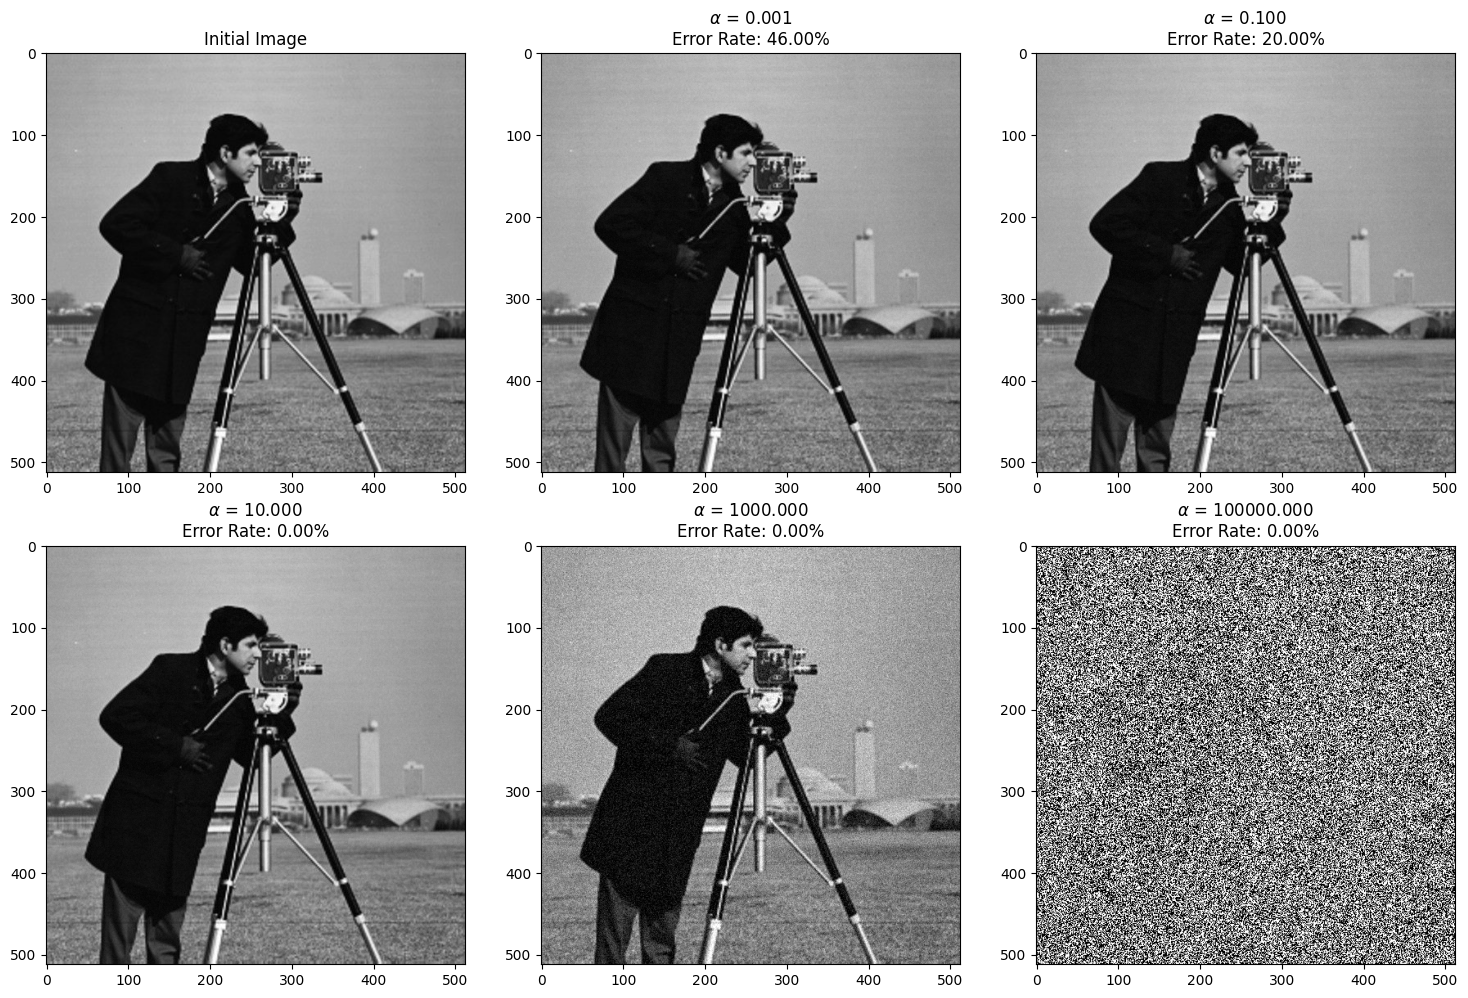


The average encoding time is: 174.07ms
The average time is: 15.74ms
The average process time is: 189.81ms 

----------------------------------------------------------------------------------------------------------------------------------------------------------




In [ ]:
sim(root)

From the results above we can observe that as the factor `alpha` (a) takes very small values, the image looks like our initial one, allegedly maintaining very similar characteristics and stay as clear as possible but with high error rate concerning the hidden message. On the other hand, when the factor `alpha` (a) increases, the image looses its initial characteristics but with lower-to-zero error rate (with alpha-value around 10 we could say) concerning the hidden message and as a result the hidden message stays intact whereas the image shows as "noisy".<br/><br/>
Additionally, concerning the `execution time`, we can observe from the image `cameraman` with dimensions (512 x 512) that it's close to what we estimated in the task 2.